In [10]:

from rl_qoc import QuantumEnvironment, ChannelReward, QiskitConfig, QEnvConfig, ExecutionConfig, GateTarget
from qiskit.circuit import QuantumCircuit, ParameterVector
from qiskit.circuit.library import RXGate, UGate, RZXGate
from gymnasium.spaces import Box
import numpy as np
seed = 30980922
np.random.seed(seed)
params = ParameterVector("a", 1)
angle = np.random.uniform(-np.pi, np.pi, size=(1,))
angle = np.array([1.43])
gate = RXGate(*angle)
target = GateTarget(gate, (0,))
def apply_qc(qc:QuantumCircuit, params, qreg):
    # qc.rzx(params[0], qreg[0], qreg[1])
    qc.rx(params[0], qreg[0])

action_space = Box(-np.pi, np.pi, shape=(1,))
backend_config = QiskitConfig(apply_qc)
exec = ExecutionConfig(sampling_paulis=10000, n_shots=1, batch_size=1, n_reps=list(range(1, 30)),
                       dfe_precision=(0.01, 0.01), seed=seed,
                       c_factor=1)
reward = ChannelReward()
q_env_config = QEnvConfig(target, backend_config, action_space, reward=reward,
                          execution_config=exec)
q_env = QuantumEnvironment(q_env_config)


In [11]:
angle


array([1.43])

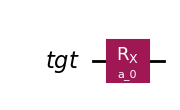

In [12]:
q_env.circuit.draw("mpl")

In [13]:
data = reward.get_reward_data(q_env.circuit, np.zeros((1, 1)), q_env.config)

In [14]:
data.fiducials

[(PauliList(['X']),
  SparsePauliOp(['X'],
                coeffs=[1686.5+0.j])),
 (PauliList(['Z']),
  SparsePauliOp(['Y'],
                coeffs=[1620.0309182+0.j])),
 (PauliList(['Y']),
  SparsePauliOp(['Z'],
                coeffs=[1661.44068606+0.j])),
 (PauliList(['Z']),
  SparsePauliOp(['Z'],
                coeffs=[252.9722352+0.j])),
 (PauliList(['Y']),
  SparsePauliOp(['Y'],
                coeffs=[206.65337523+0.j]))]

In [15]:
target.Chi(1)

array([ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.14033161,  0.99010456,  0.        ,  0.        , -0.99010456,
        0.14033161])

Number of repetitions: 1
Reward (avg): 0.9696552498916283 Std: 0.0
Number of repetitions: 2
Reward (avg): 0.8841458227213508 Std: 0.0
Number of repetitions: 3
Reward (avg): 0.7590402916855193 Std: 0.0
Number of repetitions: 4
Reward (avg): 0.617116433242879 Std: 0.0
Number of repetitions: 5
Reward (avg): 0.4842141115065765 Std: 0.0
Number of repetitions: 6
Reward (avg): 0.3845306529280749 Std: 0.0
Number of repetitions: 7
Reward (avg): 0.33621527535039136 Std: 0.0
Number of repetitions: 8
Reward (avg): 0.3480646871274445 Std: 0.0
Number of repetitions: 9
Reward (avg): 0.41792148362339904 Std: 0.0
Number of repetitions: 10
Reward (avg): 0.5330669426400082 Std: 0.0
Number of repetitions: 11
Reward (avg): 0.6725367030974357 Std: 0.0
Number of repetitions: 12
Reward (avg): 0.8109377148231509 Std: 0.0
Number of repetitions: 13
Reward (avg): 0.923071513123778 Std: 0.0
Number of repetitions: 14
Reward (avg): 0.9885220654705065 Std: 0.0
Number of repetitions: 15
Reward (avg): 0.995372887930838

[[np.float64(0.9696552498916283),
  np.float64(0.8841458227213508),
  np.float64(0.7590402916855193),
  np.float64(0.617116433242879),
  np.float64(0.4842141115065765),
  np.float64(0.3845306529280749),
  np.float64(0.33621527535039136),
  np.float64(0.3480646871274445),
  np.float64(0.41792148362339904),
  np.float64(0.5330669426400082),
  np.float64(0.6725367030974357),
  np.float64(0.8109377148231509),
  np.float64(0.923071513123778),
  np.float64(0.9885220654705065),
  np.float64(0.9953728879308382),
  np.float64(0.9423766615311996),
  np.float64(0.8391823297522931),
  np.float64(0.7045783298567062),
  np.float64(0.5630718102869526),
  np.float64(0.44042665089332944),
  np.float64(0.35897267195864213),
  np.float64(0.3335400772995247),
  np.float64(0.3687593412932076),
  np.float64(0.45821814535035643),
  np.float64(0.5856288591463233),
  np.float64(0.727794005053501),
  np.float64(0.8588297881118491),
  np.float64(0.9548787197684048),
  np.float64(0.9984533150474025)],
 [np.float6

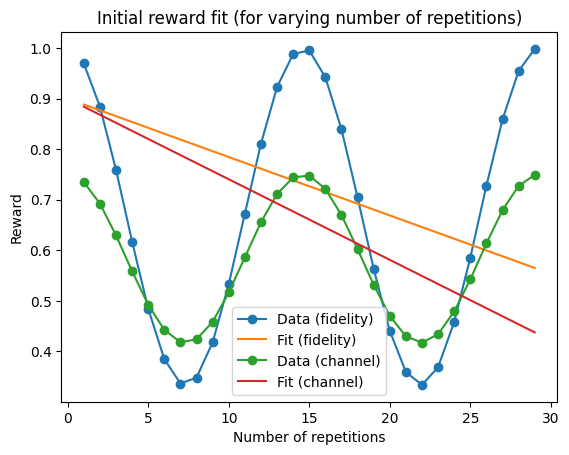

In [5]:
q_env.initial_reward_fit(np.ones(1), reward_method=["fidelity", "channel"])
